# Artificial Neural Networks and Deep Learning

---

## Homework 2: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.


## 🌐 Connect Colab to Google Drive

In [1]:
from google.colab import drive

drive.mount("/gdrive")
%cd /gdrive/My Drive/Università/ANN/Homework2

Mounted at /gdrive
/gdrive/My Drive/Università/ANN/Homework2


## ⚙️ Import Libraries

In [2]:
import os
from datetime import datetime

import numpy as np
import pandas as pd
import math

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.17.1
Keras version: 3.5.0
GPU devices: 1


## ⏳ Load the Data

In [3]:
data = np.load("mars_for_students.npz")

training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


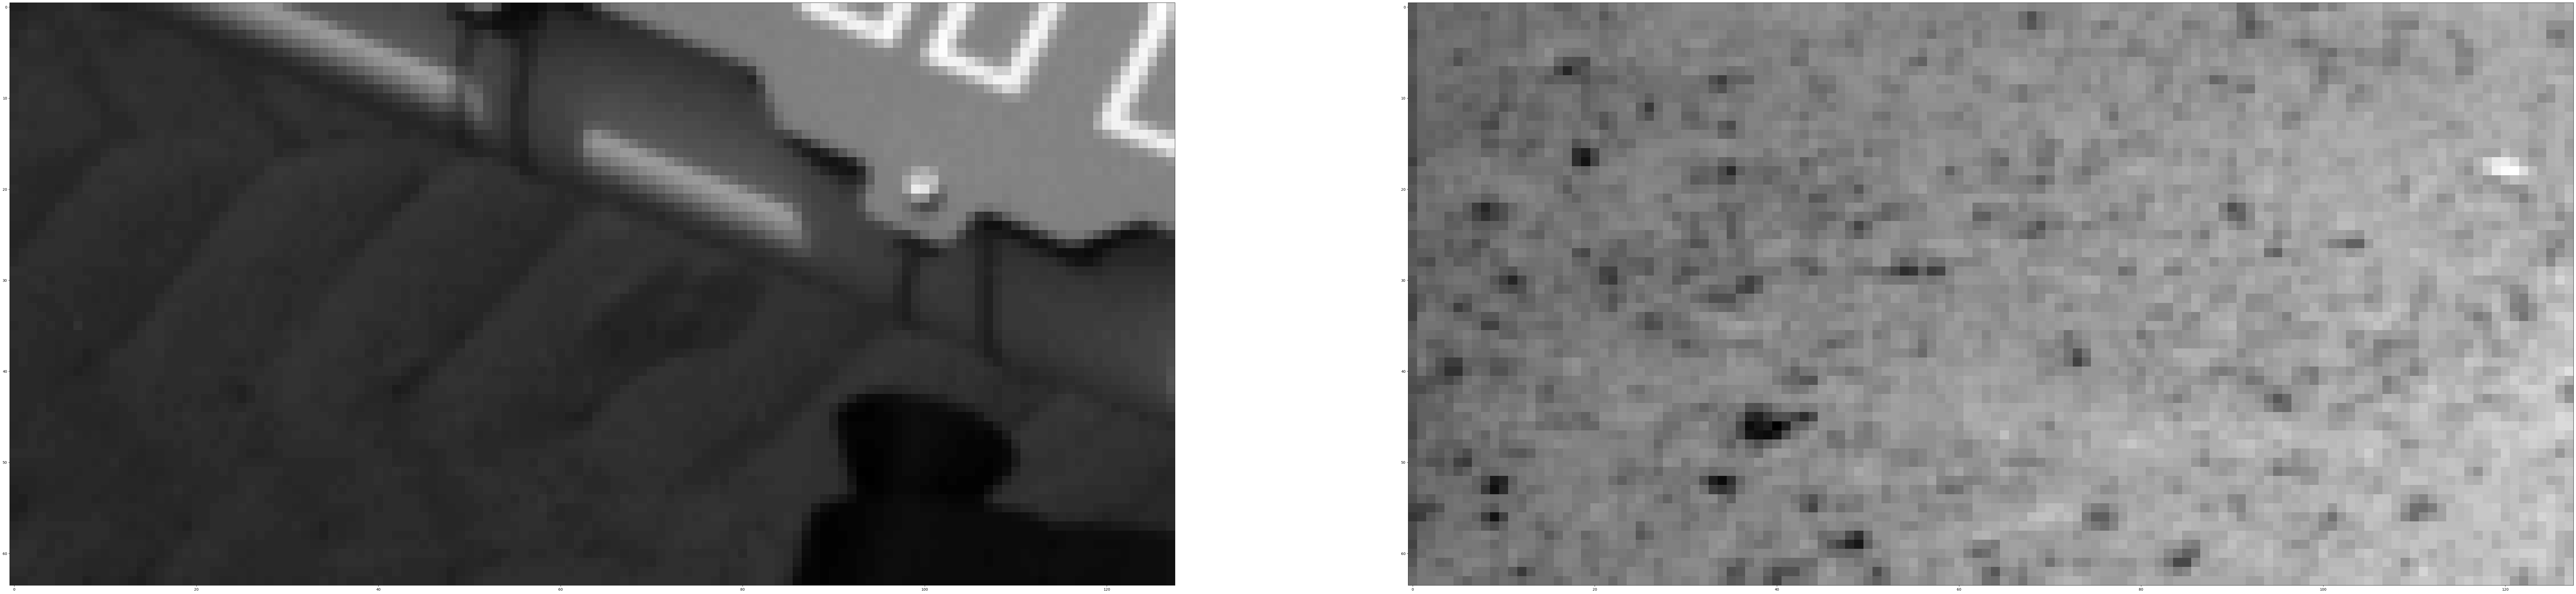

In [4]:
to_print = [8, 66]

fig, axes = plt.subplots(1, len(to_print), figsize=(128, 64))
for i, idx in enumerate(to_print):
    axes[i].imshow(X_train[idx], cmap="gray")

# 🗺 Data exploration

## Print some random images

In [ ]:
# Print some random images from X_train with the relative y_train image printed on top
num_images = 10
indices = np.random.choice(len(X_train), size=num_images, replace=False)

fig, axes = plt.subplots(num_images, 2, figsize=(10, 20))
for i, idx in enumerate(indices):
    ax1, ax2 = axes[i]
    ax1.imshow(X_train[idx], cmap="gray")
    ax1.set_title(f"X_train[{idx}]")
    ax2.imshow(y_train[idx])
    ax2.set_title(f"y_train[{idx}]")
    ax1.axis("off")
    ax2.axis("off")
plt.tight_layout()
plt.show()

## Print tha values of y_train

In [ ]:
# Print some random images from y_train showing the actual value of the pixels
num_images = 10
indices = np.random.choice(len(y_train), size=num_images, replace=False)

fig, axes = plt.subplots(num_images, 2, figsize=(10, 20))
for i, idx in enumerate(indices):
    ax1, ax2 = axes[i]
    ax1.imshow(y_train[idx])
    ax1.set_title(f"y_train[{idx}]")
    ax2.hist(y_train[idx].flatten(), bins=100)
    ax2.set_title(f"y_train[{idx}] histogram")
    ax1.axis("off")
    ax2.set_xlabel("Pixel value")
    ax2.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

## Test set exploration

In [ ]:
# Print some random images from X_test
num_images = 20
indices = np.random.choice(len(X_test), size=num_images, replace=False)

fig, axes = plt.subplots(num_images, 1, figsize=(128, 64))
for i, idx in enumerate(indices):
    ax = axes[i]
    ax.imshow(X_test[idx], cmap="gray")
    ax.set_title(f"X_test[{idx}]")
    ax.axis("off")
plt.tight_layout()
plt.show()

# Search for outliers

## PCA

Perform PCA on both the training and test set to identify possible outliers

In [ ]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")

In [ ]:
h, w, c = X_train[0].shape
X_train_flat = X_train.reshape((len(X_train), h*w*c))
print(X_train_flat.shape)

h, w, c = X_test[0].shape
X_test_flat = X_test.reshape((len(X_test), h*w*c))
print(X_test_flat.shape)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Plot the first two PCA components of training and test in two different plots
fig, axes = plt.subplots(1, 2, figsize=(12,12))
axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Training set')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PCA of training set')
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], label='Test set')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('PCA of test set')
plt.show()

In [ ]:
# Find outliers
outliers = (X_train_pca[:,1] > 5) + (X_train_pca[:,1] < -5)

# Visualisation of outliers
unique_outliers = np.unique(X_train[outliers], axis=0)
print(f"Number of outliers: {len(X_train[outliers])}")


num_outliers = len(unique_outliers)
print("Unique outliers: ", num_outliers)
cols = min(10, num_outliers)  # Set a maximum number of columns
rows = math.ceil(num_outliers / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten() if num_outliers > 1 else [axes]


for i, outlier in enumerate(unique_outliers):
    axes[i].imshow(outlier, cmap="gray")
    axes[i].axis('off')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Unique Outliers', fontsize=50)
plt.tight_layout()
plt.show()

## T-SNE

Perform T-SNE on both training and test set to identify possible outliers

In [ ]:
# t-SNE for anomaly detection
from sklearn.manifold import TSNE

h, w, c = X_train[0].shape
X_train_flat = X_train.reshape((len(X_train), h*w*c))
print(X_train_flat.shape)

h, w, c = X_test[0].shape
X_test_flat = X_test.reshape((len(X_test), h*w*c))
print(X_test_flat.shape)

X_train_scores_tsne = TSNE(n_components=2,perplexity=70).fit_transform(X_train_flat)
X_test_scores_tsne = TSNE(n_components=2,perplexity=70).fit_transform(X_test_flat)

fig, axes = plt.subplots(1, 2, figsize=(12,12))
axes[0].scatter(X_train_scores_tsne[:, 0], X_train_scores_tsne[:, 1], label='Training set')
axes[0].set_xlabel('t-SNE1')
axes[0].set_ylabel('t-SNE2')
axes[0].set_title('t-SNE of training set')
axes[1].scatter(X_test_scores_tsne[:, 0], X_test_scores_tsne[:, 1], label='Test set')
axes[1].set_xlabel('t-SNE1')
axes[1].set_ylabel('t-SNE2')
axes[1].set_title('t-SNE of test set')
plt.show()

In [ ]:
# Find outliers
outliers = (X_train_scores_tsne[:,1] > 5) + (X_train_scores_tsne[:,1] < -5)

# Visualisation of outliers
unique_outliers = np.unique(X_train[outliers], axis=0)
print(f"Number of outliers: {len(X_train[outliers])}")


num_outliers = len(unique_outliers)
print("Unique outliers: ", num_outliers)
cols = min(10, num_outliers)  # Set a maximum number of columns
rows = math.ceil(num_outliers / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten() if num_outliers > 1 else [axes]


for i, outlier in enumerate(unique_outliers):
    axes[i].imshow(outlier, cmap="gray")
    axes[i].axis('off')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Unique Outliers', fontsize=50)
plt.tight_layout()
plt.show()

# 👽 Remove Aliens

In [5]:
outliers = [62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299, 313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741, 744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005, 1057,
            1079, 1082, 1092, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247, 1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509, 1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813, 1816,
            1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110, 2111, 2151, 2161, 2222, 2235, 2239, 2242, 2301, 2307, 2350, 2361, 2365, 2372, 2414, 2453, 2522, 2535, 2561, 2609, 2614]

# outliers = [62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299, 313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741, 744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005, 1057,
#             1079, 1082, xxxx, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247, 1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509, 1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813, 1816,
#             1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110, 2111, 2151, 2161, 2222, 2235, 2239, 2242, xxxx, 2307, 2350, 2361, 2365, 2372, 2414, 2453, 2522, 2535, 2561, 2609, xxxx]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 110


In [6]:
X_train = np.delete(X_train, outliers, axis=0)
y_train = np.delete(y_train, outliers, axis=0)

# 🛠️ Train and Save the Model

In [7]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")

Input shape: (64, 128, 1)
Number of classes: 5


In [8]:
# Training Hyperparameters

EPOCHS = 1000
BATCH_SIZE = 32
LEARNING_RATE = 1e-5
NUM_CLASSES = 5
PATIENCE = 200
seed = 42

In [9]:
# Splitting X_train and y_train in training and validation dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create tensorflow datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Batch the datasets
train_dataset = train_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

## UNET

### UNET Definition

In [10]:
def unet_block(input_tensor, filters, kernel_size=3, activation='relu', stack=2, name=''):
    # Initialise the input tensor
    x = input_tensor

    # Apply a sequence of Conv2D, Batch Normalisation, and Activation layers for the specified number of stacks
    for i in range(stack):
        x = tfkl.Conv2D(filters, kernel_size=kernel_size, padding='same', name=name + 'conv' + str(i + 1))(x)
        x = tfkl.BatchNormalization(name=name + 'bn' + str(i + 1))(x)
        x = tfkl.Activation(activation, name=name + 'activation' + str(i + 1))(x)

    # Return the transformed tensor
    return x

In [11]:
def get_unet_model(input_shape=(64, 128, 1), num_classes=NUM_CLASSES, seed=seed):
    tf.random.set_seed(seed)
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling path
    down_block_1 = unet_block(input_layer, 32, name='down_block1_')
    d1 = tfkl.MaxPooling2D()(down_block_1)

    down_block_2 = unet_block(d1, 64, name='down_block2_')
    d2 = tfkl.MaxPooling2D()(down_block_2)

    # Bottleneck
    bottleneck = unet_block(d2, 128, name='bottleneck')

    # Upsampling path
    u1 = tfkl.UpSampling2D()(bottleneck)
    u1 = tfkl.Concatenate()([u1, down_block_2])
    u1 = unet_block(u1, 64, name='up_block1_')

    u2 = tfkl.UpSampling2D()(u1)
    u2 = tfkl.Concatenate()([u2, down_block_1])
    u2 = unet_block(u2, 32, name='up_block2_')

    # Output Layer
    output_layer = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', activation="softmax", name='output_layer')(u2)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='UNet')
    return model

In [12]:
# Define custom Mean Intersection Over Union metric
class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)

### Custom loss function with class weighting

#### Weighted sparse categorical cross entropy + dice

In [ ]:
from collections import Counter

def compute_class_weights(label_images, num_classes):
    """
    Compute class weights given a dataset of label images.

    Args:
    - label_images: List or array of 2D label images (grayscale).
    - num_classes: Total number of classes.

    Returns:
    - class_weights: Array of weights for each class.
    """
    # Flatten all label images to count occurrences of each class
    all_labels = np.concatenate([img.flatten() for img in label_images])

    # Count occurrences of each class
    class_counts = Counter(all_labels)

    # Compute total number of pixels
    total_pixels = sum(class_counts.values())

    # Calculate weights (inverse frequency)
    class_weights = []
    for i in range(num_classes):
        if i in class_counts:
            frequency = class_counts[i] / total_pixels
            class_weights.append(1.0 / frequency)
        else:
            # Assign a very high weight to classes not present in the data
            class_weights.append(0.0)

    # Normalize weights to make them relative
    class_weights = np.array(class_weights)
    class_weights /= np.sum(class_weights)

    return class_weights

In [ ]:
def weighted_sparse_categorical_crossentropy(class_weights):
    def loss(y_true, y_pred):
        # Ensure y_true is an integer tensor
        y_true = tf.cast(y_true, tf.int32)

        # Compute the sparse categorical crossentropy loss
        scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
        loss = scce(y_true, y_pred)

        # Extract weights for each pixel based on y_true
        weights = tf.gather(class_weights, y_true)
        weights = tf.cast(weights, tf.float32)

        # Apply weights to the loss
        weighted_loss = loss * weights

        # Return mean loss across all pixels
        return tf.reduce_mean(weighted_loss)

    return loss

def dice_loss(y_true, y_pred, smooth=1):
    """
    Dice Loss function for semantic segmentation.

    Args:
    - y_true: Ground truth labels.
    - y_pred: Predicted logits.

    Returns:
    - Dice loss value.
    """
    # One-hot encode y_true to match y_pred shape
    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=y_pred.shape[-1])
    y_true = tf.cast(y_true, tf.float32)

    # Convert logits to probabilities using softmax
    y_pred = tf.nn.softmax(y_pred, axis=-1)

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2])

    # Compute dice coefficient
    dice = (2. * intersection + smooth) / (union + smooth)

    # Dice loss is 1 - dice coefficient
    return 1 - tf.reduce_mean(dice)

def combined_loss(class_weights):
    """
    Combines weighted cross-entropy loss and Dice loss.

    Args:
    - class_weights: A list or tensor of weights for each class.

    Returns:
    - Combined loss function.
    """
    # Define the weighted cross-entropy loss
    wce_loss = weighted_sparse_categorical_crossentropy(class_weights)

    def loss(y_true, y_pred):
        # Compute weighted cross-entropy loss
        wce = wce_loss(y_true, y_pred)

        # Compute dice loss
        dice = dice_loss(y_true, y_pred)

        # Combine losses (you can adjust weights for each loss component)
        return 0.5 * wce + 0.5 * dice

    return loss

In [ ]:
class_weights = compute_class_weights(y_train, NUM_CLASSES)

print(class_weights)

[0.00557152 0.0040129  0.00579897 0.00752068 0.97709593]


#### CategoricalFocalCrossEntropy

In [13]:
from collections import Counter

def compute_class_weights(label_images, num_classes):
    """
    Compute class weights given a dataset of label images.

    Args:
    - label_images: List or array of 2D label images (grayscale).
    - num_classes: Total number of classes.

    Returns:
    - class_weights: Array of weights for each class.
    """
    print(label_images.shape)
    # Flatten all label images to count occurrences of each class
    all_labels = np.concatenate([img.flatten() for img in label_images])
    print(all_labels.shape)

    # Count occurrences of each class
    class_counts = Counter(all_labels)
    print(class_counts)

    # Compute total number of pixels
    total_pixels = sum(class_counts.values())

    # Calculate weights (inverse frequency)
    class_weights = []
    for i in range(num_classes):
        if i in class_counts:
            frequency = class_counts[i] / total_pixels
            class_weights.append(1.0 / frequency)
        else:
            # Assign a very high weight to classes not present in the data
            class_weights.append(0.0)

    # Normalize weights to make them relative
    class_weights = np.array(class_weights)
    class_weights /= np.sum(class_weights)

    return class_weights

In [14]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.losses import CategoricalFocalCrossentropy

print(y_train.shape)
# Assuming y_train is a 3D tensor of shape (num_samples, height, width) with integer class labels
# For multi-class segmentation, we flatten the labels to a 1D array of shape (num_samples * height * width,)
y_train_flattened = y_train.flatten()  # Flatten to 1D array for class frequency computation
print(y_train_flattened.shape)

# Compute class weights using inverse class frequency
class_weights1 = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flattened), y=y_train_flattened)
print(class_weights1)

# Compute class weights using inverse class frequency
class_weights2 = compute_class_weights(y_train, NUM_CLASSES)
print(class_weights2)

(2254, 64, 128)
(18464768,)
[  0.81914185   0.58998882   0.85258234   1.10571214 143.65556463]
(2254, 64, 128)
(18464768,)
Counter({1.0: 6259362, 0.0: 4508320, 2.0: 4331492, 3.0: 3339887, 4.0: 25707})
[0.00557152 0.0040129  0.00579897 0.00752068 0.97709593]


In [15]:
# Convert class_weights into a dictionary where keys are class labels and values are the corresponding weights
# If you have 5 classes, it will return a list of weights for each class
# class_weights1 perform slightly better (see submissions)
alpha = class_weights1  # alpha will be the class_weights array
# alpha = class_weights2

# Define the focal loss with alpha set to class weights
focal_loss = CategoricalFocalCrossentropy(alpha=alpha, gamma=2.0, from_logits=False)

# Define a wrapper loss function to focal_loss that one_hot encodes y_true and y_pred before applying the CategoricalFocalCrossEntropy
def focal_wrapper_loss(y_true, y_pred):
    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=y_pred.shape[-1])
    y_true = tf.cast(y_true, tf.float32)

    return focal_loss(y_true, y_pred)

#### Multiclass Dice loss

In [16]:
from tensorflow.keras import backend as K

def dice_loss(y_true, y_pred):
    smooth = 1e-6
    # Flatten the tensors to 1D
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1 - dice  # Dice loss is 1 - Dice coefficient

def multiclass_dice_loss(y_true, y_pred):
    # One-hot encode the labels if not already
    y_true = K.one_hot(K.cast(y_true, 'int32'), 5)

    # Calculate the dice loss per class and store them in a list
    dice_losses = [dice_loss(y_true[:, :, :, i], y_pred[:, :, :, i]) for i in range(5)]

    # Convert the list of dice losses to a tensor and calculate the mean
    # using Keras backend operations
    dice_losses = K.stack(dice_losses)  # Convert the list to a tensor
    return K.mean(dice_losses)  # Calculate the mean using K.mean

#### Boundary loss - still not working

In [148]:
import tensorflow as tf
from tensorflow.keras import backend as K

def calc_dist_map_tf(seg):
    """
    Calculate the distance map for the segmentation mask using TensorFlow operations.
    seg: Tensor of shape (batch_size, height, width, 1)
    """
    posmask = tf.cast(seg > 0, tf.float32)  # binary mask for positive class
    negmask = 1.0 - posmask  # binary mask for negative class

    # Adding channel dimension to posmask and negmask
    posmask = tf.expand_dims(posmask, axis=-1)
    negmask = tf.expand_dims(negmask, axis=-1)

    # Compute the distance transform using TensorFlow
    distance_pos = tf.nn.conv2d(posmask, filters=tf.ones((3, 3, 1, 1)), strides=[1,1,1,1], padding='SAME')  # approximate distance for positive class
    distance_neg = tf.nn.conv2d(negmask, filters=tf.ones((3, 3, 1, 1)), strides=[1,1,1,1], padding='SAME')  # approximate distance for negative class

    # Return distance map with some adjustment to make it similar to SciPy's behavior
    dist_map = distance_neg - distance_pos
    return dist_map

def surface_loss_keras(y_true, y_pred):
    """
    Compute the surface loss (boundary loss) between predicted and true segmentation masks.
    y_true: Ground truth segmentation (batch_size, height, width, 1)
    y_pred: Predicted segmentation probabilities (batch_size, height, width, num_classes)
    """
    # Calculate the distance map using TensorFlow (no need for tf.py_function)
    y_true_dist_map = calc_dist_map_tf(y_true)

    # Multiply the predicted segmentation by the distance map
    multipled = y_pred * y_true_dist_map

    # Return the mean of the result as the loss
    return K.mean(multipled)


#### Focal + multiclass dice

In [ ]:
def focal_dice_loss(y_true, y_pred, dice_weight=0.5):
    dice_loss_value = multiclass_dice_loss(y_true, y_pred)
    focal_loss_value = focal_wrapper_loss(y_true, y_pred)

    # You can adjust the weights to give more emphasis to one loss over the other
    return dice_weight * dice_loss_value + (1 - dice_weight) * focal_loss_value

#### Focal + dice + sparse categorical cross entropy

In [37]:
def focal_dice_sparse_loss(loss_wheights):
    def loss(y_true, y_pred):
      dice_loss_value = dice_loss(y_true, y_pred)
      focal_loss_value = focal_wrapper_loss(y_true, y_pred)

      # Compute the sparse categorical crossentropy loss
      scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
      scce_loss_value = scce(y_true, y_pred)

      print(dice_loss_value.shape)
      print(focal_loss_value.shape)
      print(scce_loss_value.shape)

      print(dice_loss_value)
      print(focal_loss_value)
      print(scce_loss_value)

      # You can adjust the weights to give more emphasis to one loss over the other
      return loss_wheights[0] * scce_loss_value + loss_wheights[1] * focal_loss_value + loss_wheights[2] * dice_loss_value

    return loss

### Define model

Model: "UNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 128, 1)   │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_conv1      │ (None, 64, 128, 32)  │          320 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_bn1        │ (None, 64, 128, 32)  │          128 │ down_block1_conv1[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_activatio… │ (None, 64, 128, 32)  │            0 │ down_block1_bn1[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_conv2      │ (None, 64, 128, 32)  │        9,248 │ down_block1_activa… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_bn2        │ (None, 64, 128, 32)  │          128 │ down_block1_conv2[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_activatio… │ (None, 64, 128, 32)  │            0 │ down_block1_bn2[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ max_pooling2d_8        │ (None, 32, 64, 32)   │            0 │ down_block1_activa… │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_conv1      │ (None, 32, 64, 64)   │       18,496 │ max_pooling2d_8[0]… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_bn1        │ (None, 32, 64, 64)   │          256 │ down_block2_conv1[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_activatio… │ (None, 32, 64, 64)   │            0 │ down_block2_bn1[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_conv2      │ (None, 32, 64, 64)   │       36,928 │ down_block2_activa… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_bn2        │ (None, 32, 64, 64)   │          256 │ down_block2_conv2[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├──────────────────────

 Total params: 473,669 (1.81 MB)

 Trainable params: 472,389 (1.80 MB)

 Non-trainable params: 1,280 (5.00 KB)

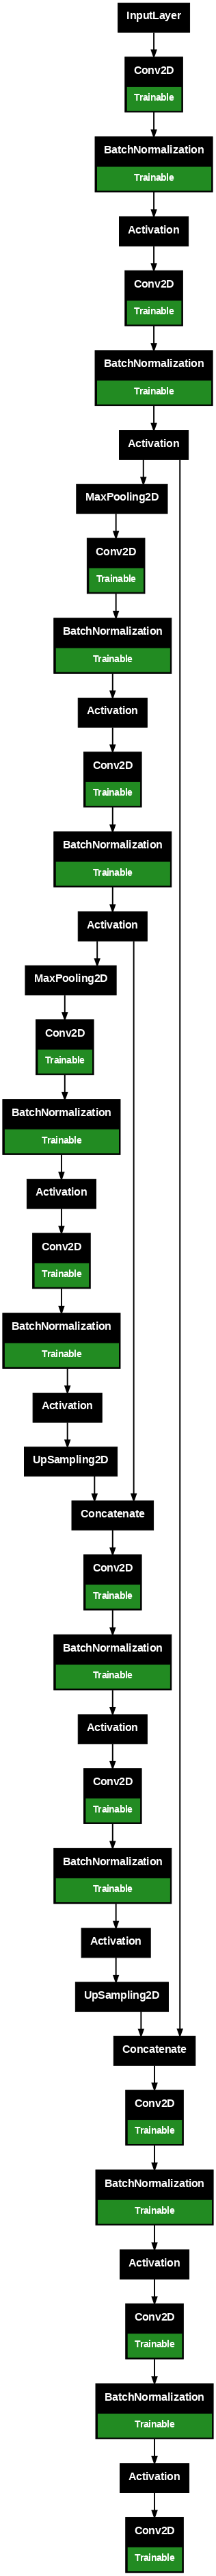

In [38]:
model = get_unet_model()

# Print a detailed summary of the model with expanded nested layers and trainable parameters.
model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)

In [39]:
# Compile the model
print("Compiling model...")
model.compile(
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # loss=combined_loss(class_weights),
    # loss=focal_wrapper_loss,
    # loss=multiclass_dice_loss,
    # loss=focal_dice_loss,
    # loss=surface_loss_keras,
    loss=focal_dice_sparse_loss([0.4, 0.3, 0.3]),
    optimizer=tf.keras.optimizers.AdamW(LEARNING_RATE),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=NUM_CLASSES, labels_to_exclude=[0])]
)
print("Model compiled!")

Compiling model...
Model compiled!


In [40]:
# Setup callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=PATIENCE,
    restore_best_weights=True
)

### Train

In [41]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[early_stopping],
    verbose=1
).history

# Calculate and print the final validation accuracy
final_val_meanIoU = round(max(history['val_mean_iou'])* 100, 2)
print(f'Final validation Mean Intersection Over Union: {final_val_meanIoU}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'UNet_'+str(final_val_meanIoU)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


()
()
(None, 64, 128)
Tensor("compile_loss/loss/sub:0", shape=(), dtype=float32)
Tensor("compile_loss/loss/categorical_focal_crossentropy/truediv_1:0", shape=(), dtype=float32)
Tensor("compile_loss/loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/Reshape_2:0", shape=(None, 64, 128), dtype=float32)
()
()
(None, 64, 128)
Tensor("compile_loss/loss/sub:0", shape=(), dtype=float32)
Tensor("compile_loss/loss/categorical_focal_crossentropy/truediv_1:0", shape=(), dtype=float32)
Tensor("compile_loss/loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/Reshape_2:0", shape=(None, 64, 128), dtype=float32)


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/loss/mul defined at (most recent call last):
<stack traces unavailable>
Incompatible shapes: [262144] vs. [1310720]
	 [[{{node compile_loss/loss/mul}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_41314[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_iterator_41627]

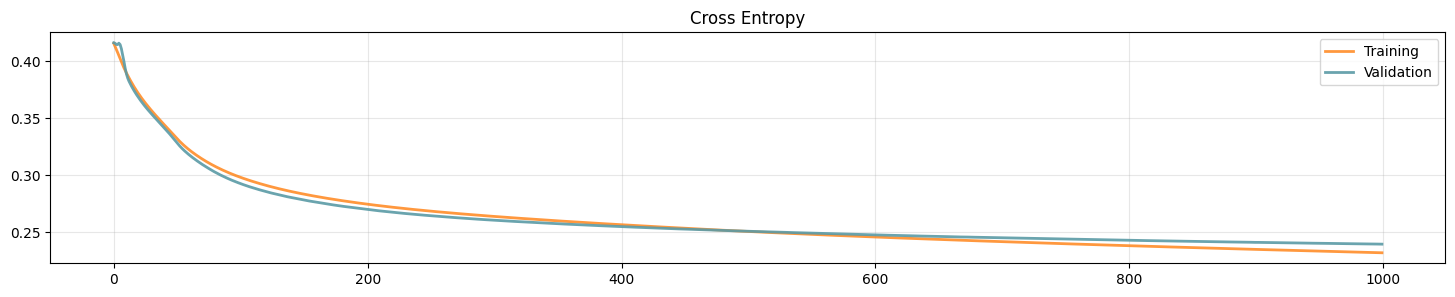

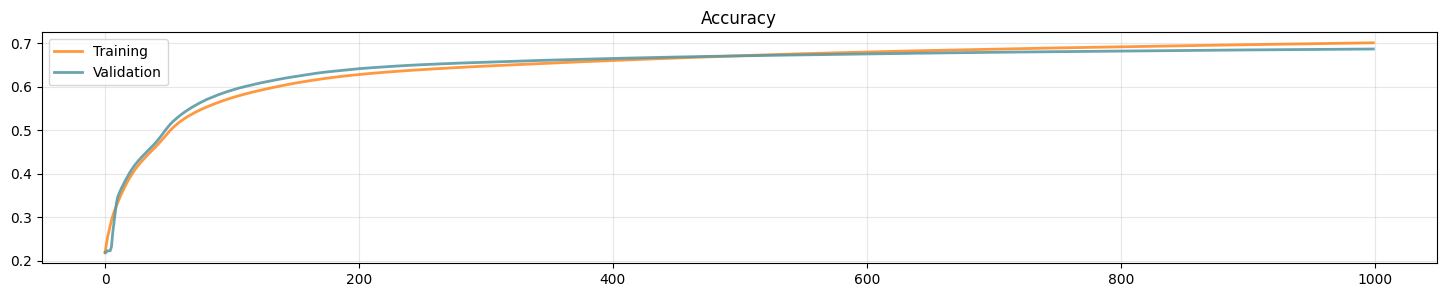

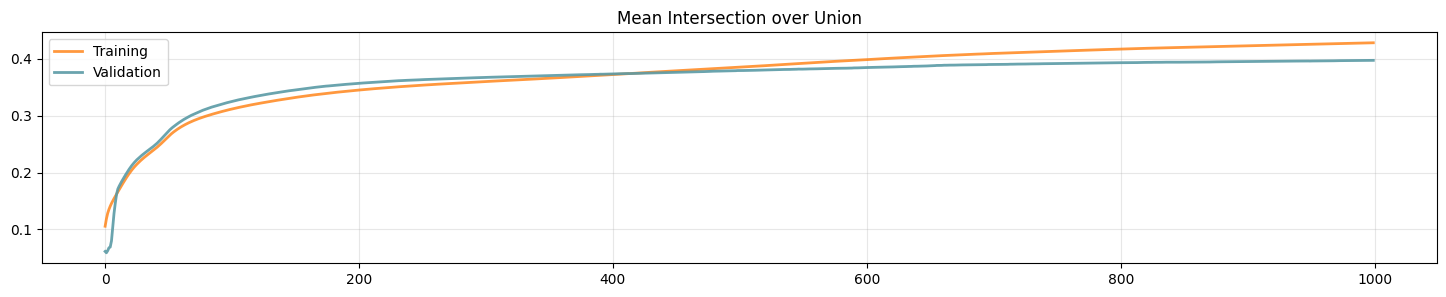

In [132]:
# Plot and display training and validation loss
plt.figure(figsize=(18, 3))
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_loss'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Cross Entropy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation accuracy
plt.figure(figsize=(18, 3))
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation mean IoU
plt.figure(figsize=(18, 3))
plt.plot(history['mean_iou'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_mean_iou'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Mean Intersection over Union')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## OLD

In [ ]:
inputs = tfkl.Input(shape=input_shape)
x = tfkl.Conv2D(filters=num_classes, kernel_size=(1, 1), activation="softmax")(inputs)
model = tfk.Model(inputs=inputs, outputs=x, name="minimal_working_net")

# Define the MeanIoU ignoring the background class
mean_iou = tfk.metrics.MeanIoU(num_classes=num_classes, ignore_class=0, sparse_y_pred=False)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=[mean_iou])

model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=1)

In [ ]:
timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model_{timestep_str}.keras"
model.save(model_filename)
del model

print(f"Model saved to {model_filename}")

## 📊 Prepare Your Submission

In our Kaggle competition, submissions are made as `csv` files. To create a proper `csv` file, you need to flatten your predictions and include an `id` column as the first column of your dataframe. To maintain consistency between your results and our solution, please avoid shuffling the test set. The code below demonstrates how to prepare the `csv` file from your model predictions.




In [ ]:
# To run if you want to load an already saved model and not the last one trained
model_filename = "NAME"

In [ ]:
# If model_filename is not defined, load the most recent model from Google Drive
if "model_filename" not in globals() or model_filename is None:
    files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith('model_') and f.endswith('.keras')]
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    if files:
        model_filename = files[0]
    else:
        raise FileNotFoundError("No model files found in the current directory.")

In [ ]:
model = tfk.models.load_model(model_filename, compile=False)

# Compile the model with specified loss, optimizer, and metrics
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tfk.optimizers.AdamW(LEARNING_RATE),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=NUM_CLASSES, labels_to_exclude=[0])]
)

print(f"Model loaded from {model_filename}")

Model loaded from UNet_41.27.keras


In [ ]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
print(f"Predictions shape: {preds.shape}")

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predictions shape: (10022, 64, 128)


In [ ]:
def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

# from google.colab import files
# files.download(submission_filename)

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Alberto Archetti 📧 alberto.archetti@polito.it





```
   Copyright 2024 Alberto Archetti

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```